Load the Preprocessed Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import logging
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the preprocessed dataset
train_path = '../src/Data/cleaned_train.csv'
test_path = '../src/Data/cleaned_test.csv'

try:
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    logging.info("Data loaded successfully.")
except Exception as e:
    logging.error(f"Error loading data: {e}")

2025-01-10 20:54:45,646 - INFO - Data loaded successfully.


Handling NaN Values

In [2]:
# Fill NaN values in the train DataFrame
train['StateHoliday'].fillna(0, inplace=True)
train['CompetitionDistance'].fillna(train['CompetitionDistance'].mean(), inplace=True)
train['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
train['CompetitionOpenSinceYear'].fillna(0, inplace=True)
train['Promo2SinceWeek'].fillna(0, inplace=True)
train['Promo2SinceYear'].fillna(0, inplace=True)
train['PromoInterval'].fillna('None', inplace=True)

# Fill NaN values in the test DataFrame
test['CompetitionDistance'].fillna(test['CompetitionDistance'].mean(), inplace=True)
test['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
test['CompetitionOpenSinceYear'].fillna(0, inplace=True)
test['Promo2SinceWeek'].fillna(0, inplace=True)
test['Promo2SinceYear'].fillna(0, inplace=True)
test['PromoInterval'].fillna('None', inplace=True)

# Verify that there are no NaN values left
print("NaN values in train DataFrame after filling:")
print(train.isna().sum())

print("\nNaN values in test DataFrame after filling:")
print(test.isna().sum())

C:\Users\Abeni\AppData\Local\Temp\ipykernel_3024\1793574023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['StateHoliday'].fillna(0, inplace=True)
C:\Users\Abeni\AppData\Local\Temp\ipykernel_3024\1793574023.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

NaN values in train DataFrame after filling:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
dtype: int64

NaN values in test DataFrame after filling:
Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 

Extract Additional Features

In [3]:
# Extract additional features from date
logging.info("Extracting additional features from date...")
try:
    # train['Day'] = pd.to_datetime(train['Date']).dt.day
    train['Weekday'] = pd.to_datetime(train['Date']).dt.weekday
    train['Is_Weekend'] = train['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
    train['Is_Beginning_Month'] = train['Day'].apply(lambda x: 1 if x <= 10 else 0)
    train['Is_Mid_Month'] = train['Day'].apply(lambda x: 1 if 10 < x <= 20 else 0)
    train['Is_End_Month'] = train['Day'].apply(lambda x: 1 if x > 20 else 0)

    # test['Day'] = pd.to_datetime(test['Date']).dt.day
    test['Weekday'] = pd.to_datetime(test['Date']).dt.weekday
    test['Is_Weekend'] = test['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
    test['Is_Beginning_Month'] = test['Day'].apply(lambda x: 1 if x <= 10 else 0)
    test['Is_Mid_Month'] = test['Day'].apply(lambda x: 1 if 10 < x <= 20 else 0)
    test['Is_End_Month'] = test['Day'].apply(lambda x: 1 if x > 20 else 0)
    logging.info("Additional features extracted successfully.")
except Exception as e:
    logging.error(f"Error extracting additional features: {e}")

2025-01-10 20:57:26,075 - INFO - Extracting additional features from date...
2025-01-10 20:57:29,998 - INFO - Additional features extracted successfully.


Creating Days_To_Next_Holiday and Days_After_Last_Holiday Features

In [4]:
# Calculate number of days to the next holiday and number of days after the last holiday
def days_to_next_holiday(date, holidays):
    future_holidays = [holiday for holiday in holidays if holiday >= date]
    if future_holidays:
        return (future_holidays[0] - date).days
    else:
        return np.nan

def days_after_last_holiday(date, holidays):
    past_holidays = [holiday for holiday in holidays if holiday <= date]
    if past_holidays:
        return (date - past_holidays[-1]).days
    else:
        return np.nan

# Assuming 'StateHoliday' column contains holiday information
holidays = pd.to_datetime(train[train['StateHoliday'] != 0]['Date'].unique())

train['Days_To_Next_Holiday'] = train['Date'].apply(lambda x: days_to_next_holiday(pd.to_datetime(x), holidays))
train['Days_After_Last_Holiday'] = train['Date'].apply(lambda x: days_after_last_holiday(pd.to_datetime(x), holidays))

test['Days_To_Next_Holiday'] = test['Date'].apply(lambda x: days_to_next_holiday(pd.to_datetime(x), holidays))
test['Days_After_Last_Holiday'] = test['Date'].apply(lambda x: days_after_last_holiday(pd.to_datetime(x), holidays))

# Verify the new features
print("Head of train DataFrame with new features:")
print(train[['Date', 'Days_To_Next_Holiday', 'Days_After_Last_Holiday']].head())

print("\nHead of test DataFrame with new features:")
print(test[['Date', 'Days_To_Next_Holiday', 'Days_After_Last_Holiday']].head())

Head of train DataFrame with new features:
         Date  Days_To_Next_Holiday  Days_After_Last_Holiday
0  2015-07-31                   NaN                      941
1  2015-07-31                   NaN                      941
2  2015-07-31                   NaN                      941
3  2015-07-31                   NaN                      941
4  2015-07-31                   NaN                      941

Head of test DataFrame with new features:
         Date  Days_To_Next_Holiday  Days_After_Last_Holiday
0  2015-09-17                   NaN                      989
1  2015-09-17                   NaN                      989
2  2015-09-17                   NaN                      989
3  2015-09-17                   NaN                      989
4  2015-09-17                   NaN                      989


Check for NaN values in the Days_To_Next_Holiday and Days_After_Last_Holiday columns

In [6]:
# Check for NaN values in the Days_To_Next_Holiday and Days_After_Last_Holiday columns in the train DataFrame
nan_days_to_next_holiday_train = train['Days_To_Next_Holiday'].isna().sum()
nan_days_after_last_holiday_train = train['Days_After_Last_Holiday'].isna().sum()

print("NaN values in Days_To_Next_Holiday column in the train DataFrame:", nan_days_to_next_holiday_train)
print("NaN values in Days_After_Last_Holiday column in the train DataFrame:", nan_days_after_last_holiday_train)

# Check for NaN values in the Days_To_Next_Holiday and Days_After_Last_Holiday columns in the test DataFrame
nan_days_to_next_holiday_test = test['Days_To_Next_Holiday'].isna().sum()
nan_days_after_last_holiday_test = test['Days_After_Last_Holiday'].isna().sum()

print("NaN values in Days_To_Next_Holiday column in the test DataFrame:", nan_days_to_next_holiday_test)
print("NaN values in Days_After_Last_Holiday column in the test DataFrame:", nan_days_after_last_holiday_test)

NaN values in Days_To_Next_Holiday column in the train DataFrame: 63555
NaN values in Days_After_Last_Holiday column in the train DataFrame: 0
NaN values in Days_To_Next_Holiday column in the test DataFrame: 41088
NaN values in Days_After_Last_Holiday column in the test DataFrame: 0


 Fill NaN values in the Days_To_Next_Holiday column with 0

In [7]:
# Fill NaN values in the Days_To_Next_Holiday column with 0
train['Days_To_Next_Holiday'].fillna(0, inplace=True)
test['Days_To_Next_Holiday'].fillna(0, inplace=True)

# Verify that there are no NaN values left in the Days_To_Next_Holiday column
nan_days_to_next_holiday_train = train['Days_To_Next_Holiday'].isna().sum()
nan_days_to_next_holiday_test = test['Days_To_Next_Holiday'].isna().sum()

print("NaN values in Days_To_Next_Holiday column in the train DataFrame after filling:", nan_days_to_next_holiday_train)
print("NaN values in Days_To_Next_Holiday column in the test DataFrame after filling:", nan_days_to_next_holiday_test)

NaN values in Days_To_Next_Holiday column in the train DataFrame after filling: 0
NaN values in Days_To_Next_Holiday column in the test DataFrame after filling: 0


C:\Users\Abeni\AppData\Local\Temp\ipykernel_3024\2560046640.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Days_To_Next_Holiday'].fillna(0, inplace=True)
C:\Users\Abeni\AppData\Local\Temp\ipykernel_3024\2560046640.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Plotting the distributions

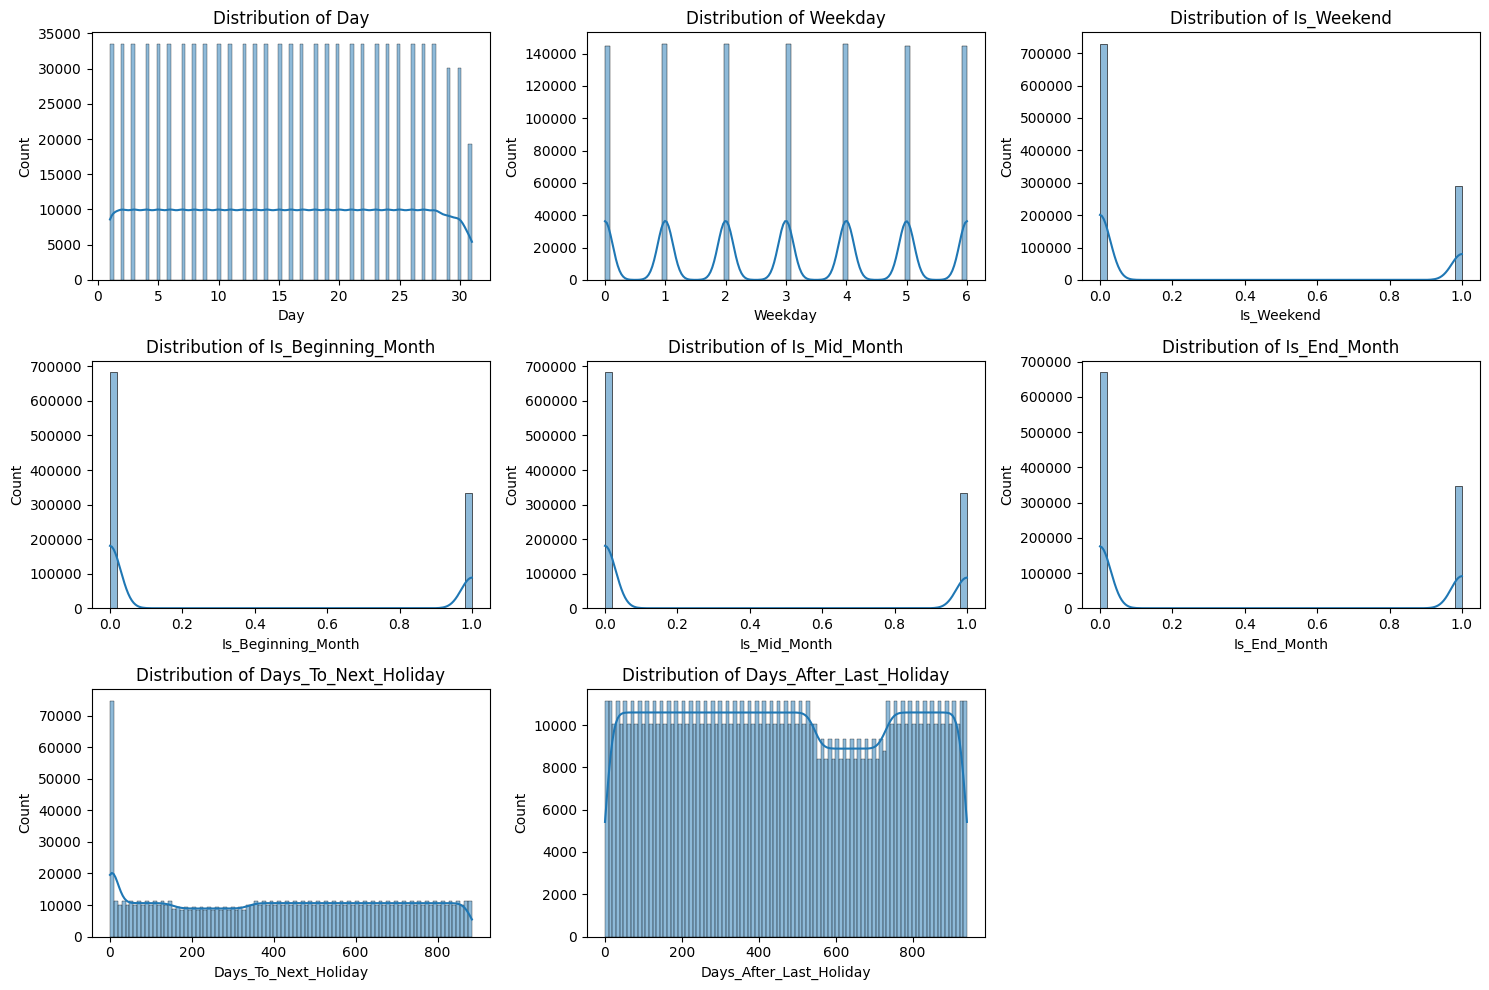

In [8]:
# Plotting the distributions
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(train['Day'], kde=True)
plt.title('Distribution of Day')

plt.subplot(3, 3, 2)
sns.histplot(train['Weekday'], kde=True)
plt.title('Distribution of Weekday')

plt.subplot(3, 3, 3)
sns.histplot(train['Is_Weekend'], kde=True)
plt.title('Distribution of Is_Weekend')

plt.subplot(3, 3, 4)
sns.histplot(train['Is_Beginning_Month'], kde=True)
plt.title('Distribution of Is_Beginning_Month')

plt.subplot(3, 3, 5)
sns.histplot(train['Is_Mid_Month'], kde=True)
plt.title('Distribution of Is_Mid_Month')

plt.subplot(3, 3, 6)
sns.histplot(train['Is_End_Month'], kde=True)
plt.title('Distribution of Is_End_Month')

plt.subplot(3, 3, 7)
sns.histplot(train['Days_To_Next_Holiday'], kde=True)
plt.title('Distribution of Days_To_Next_Holiday')

plt.subplot(3, 3, 8)
sns.histplot(train['Days_After_Last_Holiday'], kde=True)
plt.title('Distribution of Days_After_Last_Holiday')

plt.tight_layout()
plt.show()

Check for NaN values in the train DataFrame

In [11]:
# Check for NaN values in the train DataFrame and display only columns with NaN values
nan_columns_train = train.columns[train.isna().any()].tolist()
nan_counts_train = train[nan_columns_train].isna().sum()
nan_percentage_train = (nan_counts_train / len(train)) * 100

print("Columns with NaN values in the train DataFrame:")
print(pd.DataFrame({'NaN Count': nan_counts_train, 'NaN Percentage': nan_percentage_train}))

# Check for NaN values in the test DataFrame and display only columns with NaN values
nan_columns_test = test.columns[test.isna().any()].tolist()
nan_counts_test = test[nan_columns_test].isna().sum()
nan_percentage_test = (nan_counts_test / len(test)) * 100

print("\nColumns with NaN values in the test DataFrame:")
print(pd.DataFrame({'NaN Count': nan_counts_test, 'NaN Percentage': nan_percentage_test}))

Columns with NaN values in the train DataFrame:
Empty DataFrame
Columns: [NaN Count, NaN Percentage]
Index: []

Columns with NaN values in the test DataFrame:
Empty DataFrame
Columns: [NaN Count, NaN Percentage]
Index: []


Convert Non-Numeric Columns to Numeric

In [12]:
# List of non-numeric columns to convert
non_numeric_columns = ['StoreType', 'Assortment', 'PromoInterval']

# Apply one-hot encoding to non-numeric columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features_train = encoder.fit_transform(train[non_numeric_columns])
encoded_features_test = encoder.transform(test[non_numeric_columns])

# Create DataFrames with the encoded features
encoded_df_train = pd.DataFrame(encoded_features_train, columns=encoder.get_feature_names_out(non_numeric_columns))
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(non_numeric_columns))

# Concatenate the encoded features with the original DataFrames
train = pd.concat([train, encoded_df_train], axis=1)
test = pd.concat([test, encoded_df_test], axis=1)

In [13]:
# Encode StoreType and Assortment columns
storetype_mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
assortment_mapping = {'a': 1, 'b': 2, 'c': 3}

train['StoreType'] = train['StoreType'].map(storetype_mapping)
train['Assortment'] = train['Assortment'].map(assortment_mapping)

test['StoreType'] = test['StoreType'].map(storetype_mapping)
test['Assortment'] = test['Assortment'].map(assortment_mapping)

# Remove PromoInterval column
train = train.drop(columns=['PromoInterval'])
test = test.drop(columns=['PromoInterval'])

Save the cleaned DataFrame

In [15]:
# Save the cleaned train DataFrame
train.to_csv('../src/Data/cleaned_ML_train.csv', index=False)

# Save the cleaned test DataFrame
test.to_csv('../src/Data/cleaned_ML_test.csv', index=False)

print("Cleaned data saved successfully!")

Cleaned data saved successfully!


In [16]:
# List of numeric columns to scale in the train dataset (excluding binary columns)
numeric_columns_train = ['Sales', 'Customers', 'StateHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear', 'Weekday', 'Days_To_Next_Holiday', 'Days_After_Last_Holiday', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None']

# List of numeric columns to scale in the test dataset (excluding binary columns and target variable)
numeric_columns_test = ['StateHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day', 'WeekOfYear', 'Weekday', 'Days_To_Next_Holiday', 'Days_After_Last_Holiday', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None']

# Initialize the StandardScaler for train and test datasets
scaler_train = StandardScaler()
scaler_test = StandardScaler()

# Fit and transform the train DataFrame
train_scaled = train.copy()
train_scaled[numeric_columns_train] = scaler_train.fit_transform(train[numeric_columns_train])

# Fit and transform the test DataFrame (using separate scaler)
test_scaled = test.copy()
test_scaled[numeric_columns_test] = scaler_test.fit_transform(test[numeric_columns_test])

# Save the scaled data
train_scaled.to_csv('../src/Data/scaled_ML_train.csv', index=False)
test_scaled.to_csv('../src/Data/scaled_ML_test.csv', index=False)

print("Data scaled and saved successfully!")

Data scaled and saved successfully!
